In [25]:
import os
from os import path
from datetime import datetime
import pandas as pd

In [26]:
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from matplotlib.ticker import MaxNLocator

plt.rcParams["figure.figsize"] = (10, 5)

# sns.set_theme(style="darkgrid")

In [27]:
import seaborn as sns

In [28]:
filename = path.join('..', 'data', 'raw', 'BOLETIM_DIARIO_CORONAVIRUS_SAP.xlsx')

assert path.exists(filename), f"Caminho para o arquivo não existe:\n{filename}"

In [29]:
frame = pd.read_excel(filename,
                   index_col="DATA",
                   parse_dates=['DATA'],
                   engine='openpyxl')

In [30]:
frame.head()

,DESCARTADOS,EM INVESTIGACAO,CONFIRMADOS,EXAMINADOS,RECUPERADOS,ATIVOS,HOSPITAL,DOMICILIO,OBITOS
DATA,,,,,,,,,
2020-07-03,690,263,105,1058,63,38,3,35,4
2020-07-04,709,251,109,1069,65,43,3,40,4
2020-07-05,711,252,110,1073,71,35,3,32,4
2020-07-06,722,293,121,1136,79,38,2,36,4
2020-07-07,794,264,126,1184,85,37,4,33,4


In [31]:
frame.tail()

,DESCARTADOS,EM INVESTIGACAO,CONFIRMADOS,EXAMINADOS,RECUPERADOS,ATIVOS,HOSPITAL,DOMICILIO,OBITOS
DATA,,,,,,,,,
2021-06-25,12645,109,5914,18668,5448,331,20,311,135
2021-06-26,12736,81,5934,18751,5499,300,20,280,135
2021-06-27,12738,79,5934,18751,5545,253,20,233,136
2021-06-28,12749,119,5943,18811,5566,241,21,220,136
2021-06-29,12836,122,5961,18919,5597,228,20,208,136


In [32]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 362 entries, 2020-07-03 to 2021-06-29
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   DESCARTADOS      362 non-null    int64
 1   EM INVESTIGACAO  362 non-null    int64
 2   CONFIRMADOS      362 non-null    int64
 3   EXAMINADOS       362 non-null    int64
 4   RECUPERADOS      362 non-null    int64
 5   ATIVOS           362 non-null    int64
 6   HOSPITAL         362 non-null    int64
 7   DOMICILIO        362 non-null    int64
 8   OBITOS           362 non-null    int64
dtypes: int64(9)
memory usage: 28.3 KB


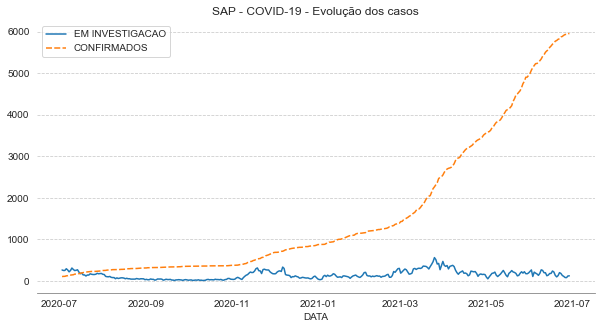

In [33]:
params = {
    'axes.facecolor' : 'white',
    'axes.titlesize' : 'larger', 
    'axes.titleweight' : 'bold',
    'axes.edgecolor': 'gray',
    "axes.grid" : True,
    "grid.linewidth": 0.9,
    'grid.linestyle': '--', 
    'axes.grid.which' : 'major'
    }
# sns.set_theme(params)
sns.set_style("whitegrid", params)
# sns.set_context("paper", rc=params)

ax = sns.lineplot(data=frame[['EM INVESTIGACAO', 'CONFIRMADOS']],
            palette="tab10"
            )

_ = ax.set_title("SAP - COVID-19 - Evolução dos casos")

ax.xaxis.grid(False)
sns.despine(left=True)

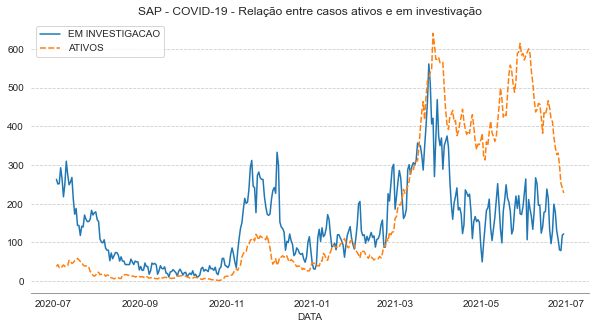

In [34]:
ax = sns.lineplot(data=frame[['EM INVESTIGACAO', 'ATIVOS']],
            palette="tab10"
            )

_ = ax.set_title("SAP - COVID-19 - Relação entre casos ativos e em investivação")

ax.xaxis.grid(False)
sns.despine(left=True)

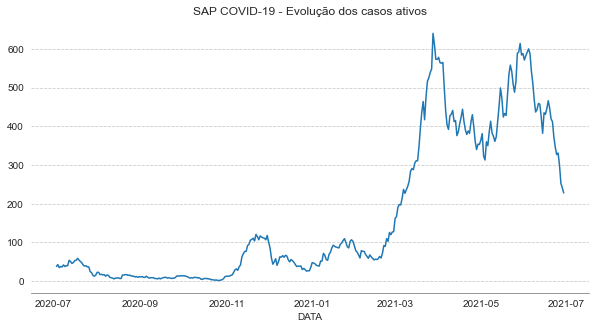

In [35]:
ax = sns.lineplot(data=frame[['ATIVOS']], legend=False)
_ = ax.set_title("SAP COVID-19 - Evolução dos casos ativos")

ax.xaxis.grid()
# ax.set_ylim([-10, 300])
sns.despine(left=True)

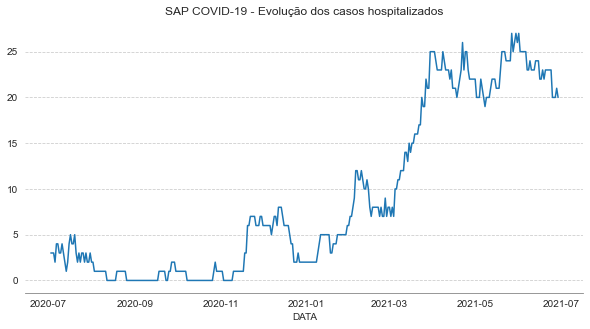

In [36]:
ax = sns.lineplot(data=frame[['HOSPITAL']],
             palette="tab10",
             legend=False
            )
_ = ax.set_title("SAP COVID-19 - Evolução dos casos hospitalizados")

# ax.set_ylim([-10, 250])
ax.xaxis.grid()
sns.despine(left=True)


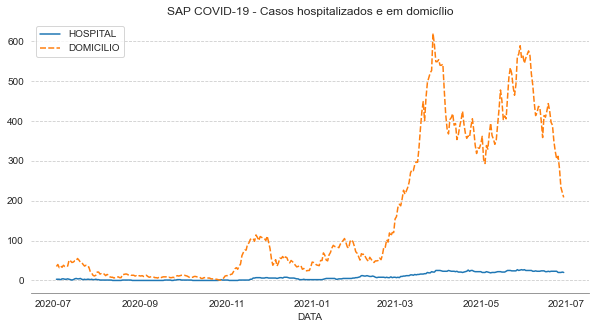

In [37]:
ax = sns.lineplot(data=frame[['HOSPITAL', 'DOMICILIO']],
             palette="tab10"
            )
_ = ax.set_title("SAP COVID-19 - Casos hospitalizados e em domicílio")

# ax.set_ylim([-10, 250])
ax.xaxis.grid()
sns.despine(left=True)

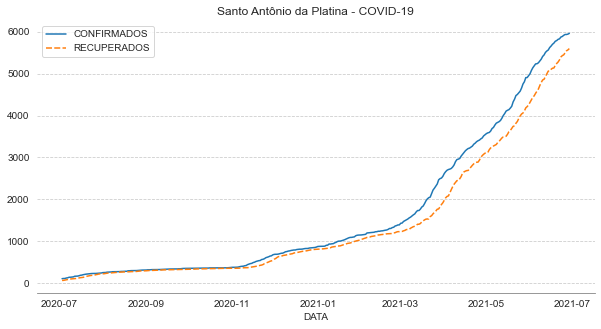

In [38]:
ax = sns.lineplot(data=frame[['CONFIRMADOS','RECUPERADOS']],
             palette="tab10"
            )
_ = ax.set_title("Santo Antônio da Platina - COVID-19")
ax.xaxis.grid()
sns.despine(left=True)

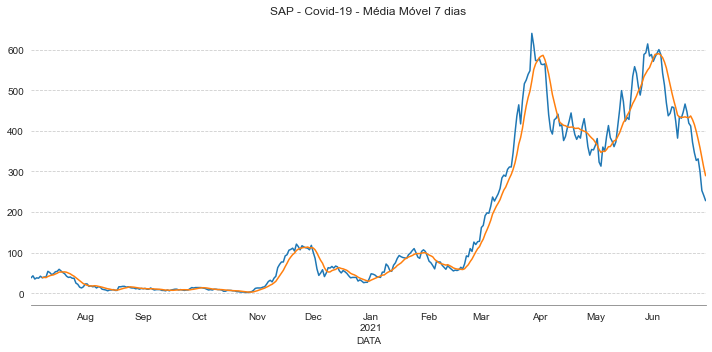

In [39]:
dias = 7

ax = frame['ATIVOS'].plot()
ax = frame['ATIVOS'].rolling(dias).mean().plot()

_ = ax.set_title(f"SAP - Covid-19 - Média Móvel {dias} dias")
ax.xaxis.grid()
sns.despine(left=True)
plt.tight_layout()

In [40]:
df = frame['RECUPERADOS'].diff(periods=1)

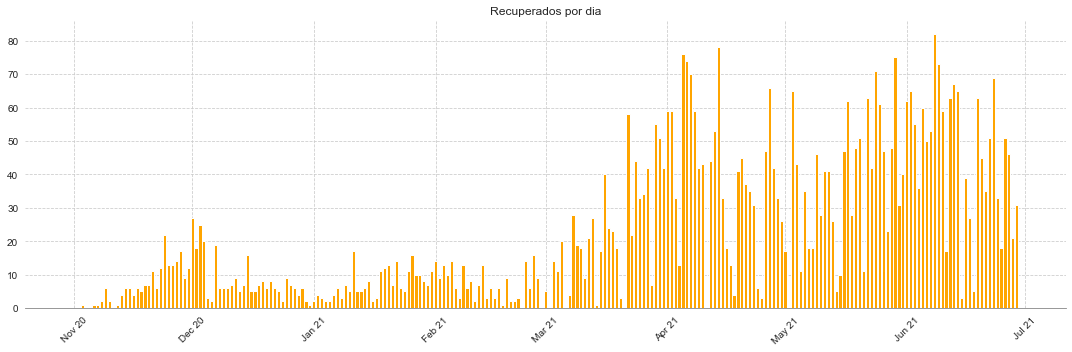

In [41]:
plt.figure(figsize=(15,5))
ax = plt.subplot()
index = df['2020-11':].index
plt.bar(index, df['2020-11':], color='orange')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %y"))
# ax.set(ylim=[0, 60])
plt.xticks(rotation=45)
_ = ax.set_title(f"Recuperados por dia")
sns.despine(left=True)
plt.tight_layout()

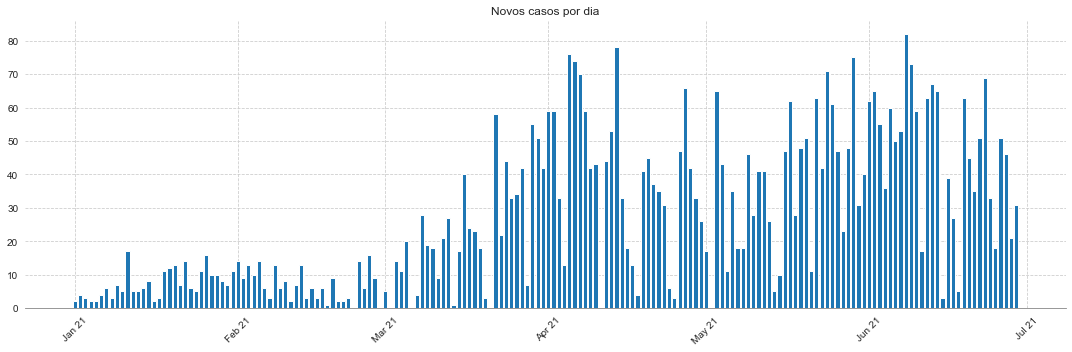

In [42]:
plt.figure(figsize=(15,5))
ax = plt.subplot()

plt.bar(df['2021':].index, df['2021':])

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %y"))
# ax.set(ylim=[0, 60])
plt.xticks(rotation=45)
_ = ax.set_title(f"Novos casos por dia")
sns.despine(left=True)
plt.tight_layout()

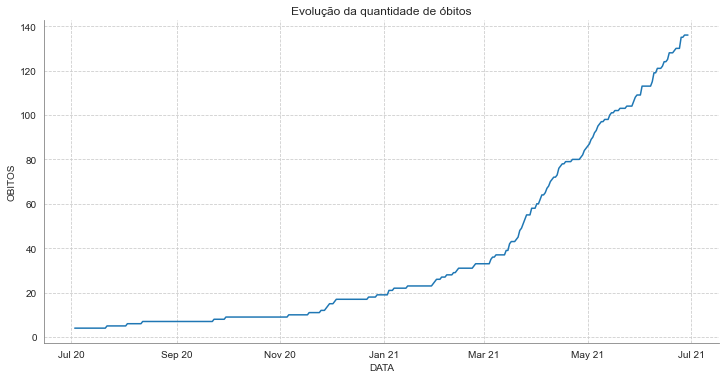

In [43]:
fig = sns.relplot(kind="line", data=frame['OBITOS'], height=5, aspect=2)
ax = fig.facet_axis(0,0)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %y"))

# ax.set(yticks=range(4,20))

_ = ax.set(title="Evolução da quantidade de óbitos")

In [44]:
deaths = frame['OBITOS'].diff(periods=1)

deaths.head()

DATA
2020-07-03    NaN
2020-07-04    0.0
2020-07-05    0.0
2020-07-06    0.0
2020-07-07    0.0
Name: OBITOS, dtype: float64

In [45]:
groupdeaths = deaths.groupby([(deaths.index.year),(deaths.index.month)]).sum()

In [46]:
def formatter(label):
    yearDict = {
        2020 : '20',
        2021 : '21'
    }
    monthDict = {
        1:'Jan', 
        2:'Fev', 
        3:'Mar', 
        4:'Abr', 
        5:'Maio', 
        6:'Jun', 
        7:'Jul', 
        8:'Ago', 
        9:'Set', 
        10:'Out', 
        11:'Nov', 
        12:'Dez'}

    return f"{monthDict[label[1]]} {yearDict[label[0]]}"

formatter((2020, 7))

'Jul 20'

In [47]:
labels = [formatter(label) for label in groupdeaths.index]

labels

['Jul 20',
 'Ago 20',
 'Set 20',
 'Out 20',
 'Nov 20',
 'Dez 20',
 'Jan 21',
 'Fev 21',
 'Mar 21',
 'Abr 21',
 'Maio 21',
 'Jun 21']

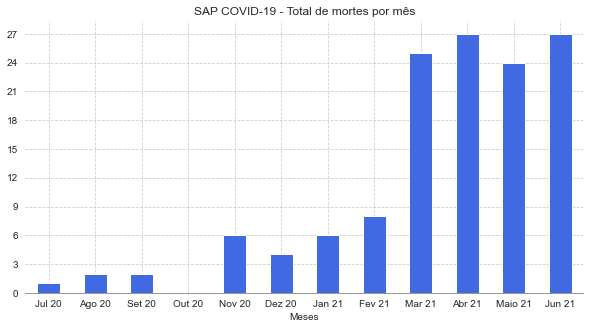

In [48]:

ax = groupdeaths.plot(kind='bar', color='royalblue')

ax.set(title='SAP COVID-19 - Total de mortes por mês')
ax.set_xticklabels(labels)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel("Meses")
ax.tick_params(axis="x", rotation=0)
sns.despine(left=True)